In [24]:
# Import Dependencies
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [25]:
gp_df = pd.read_csv('gld_price_data.csv')

In [26]:
gp_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [27]:
gp_df.shape

(2290, 6)

In [28]:
gp_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [29]:
print("First Date : " , gp_df.Date.min())
print("Last Date : ", gp_df.Date.max())

First Date :  1/10/2008
Last Date :  9/9/2015


In [30]:
gp_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


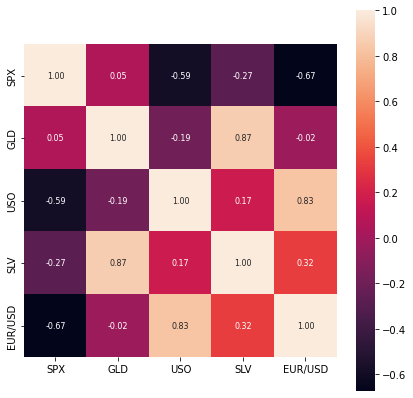

In [31]:
# Correlation
corr = gp_df.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr,cbar=True,square=True,annot=True,fmt='.2f',annot_kws={'size' : 8})

In [32]:
# Correlation GLD
print(corr['GLD'].sort_values(ascending=False))

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


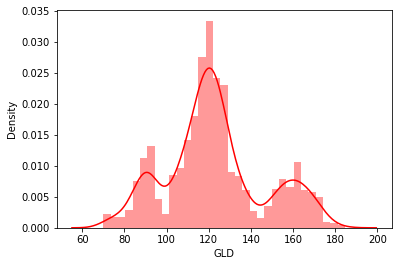

In [33]:
#Distribution of GLD values 
sns.distplot(gp_df['GLD'],color='red')

In [34]:
# Splitting Data and label 
X = gp_df.drop(columns = ['GLD' , 'Date'],axis=1)
Y = gp_df['GLD']

In [35]:
# Splitting into Train and Test Data 
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,random_state = 0, test_size = 0.8 ) 

In [37]:
# Create Model and fitting it 
mregressor = RandomForestRegressor(random_state=0)
mregressor.fit(X_train,Y_train)

RandomForestRegressor(random_state=0)

In [38]:
# Predict on Test Data 
predictions_test = mregressor.predict(X_test)
# Predict on Train Data 
predictions_train = mregressor.predict(X_train)

In [39]:
# Evaluation 
print('R squared error ',metrics.r2_score(Y_test,predictions_test))
print('MAE :'," ", metrics.mean_absolute_error(Y_test,predictions_test))
print('MSE :'," ", metrics.mean_squared_error(Y_test,predictions_test))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(Y_test,predictions_test)))

R squared error  0.977799800464962
MAE :   1.9689827705840652
MSE :   11.968645327262255
RMAE :   3.459572997822456


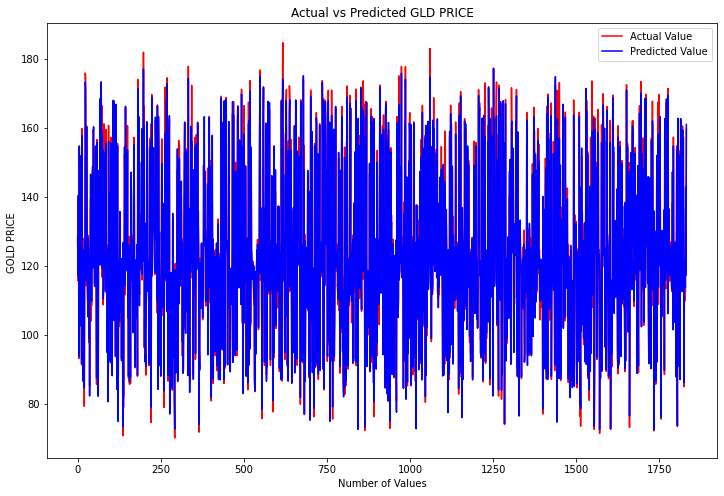

In [40]:
#Compare Predicted Values with the actual ones 
Y_test = list(Y_test)
plt.figure(figsize = (12,8))
plt.plot(Y_test,color='red',label = 'Actual Value')
plt.plot(predictions_test,color='Blue',label = 'Predicted Value')
plt.title('Actual vs Predicted GLD PRICE')
plt.xlabel("Number of Values")
plt.ylabel("GOLD PRICE ")
plt.legend()